**Introducción**\
Este proyecto tiene como objetivo analizar las empresas que conforman el índice IPSA utilizando herramientas de análisis financiero y técnicas de aprendizaje automático. A partir de los datos financieros trimestrales, se han aplicado diversos procesos de limpieza, filtrado y transformación para garantizar la homogeneidad de las muestras y obtener una estructura uniforme de datos. Posteriormente, se implementaron algoritmos de agrupamiento (clustering) como K-Means para identificar patrones y similitudes entre empresas, independientemente del sector al que pertenezcan.

El análisis se complementa con visualizaciones que facilitan la interpretación de los resultados, como la reducción de dimensiones con PCA para representar los clústeres en un espacio bidimensional. Estas técnicas permiten obtener una visión más clara de cómo se agrupan las empresas según sus características financieras.

In [32]:
#importamos librerias a utilizar
import pandas as pd
from datetime import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [33]:
!pip install adjustText

from adjustText import adjust_text

# Sección nueva

In [34]:
!pip install yfinance

import yfinance as yf

Revisamos la informacion que podemos obtener de yfinance, esta es la informacion que utilizaremos para el analisis final

In [35]:
# Define the date range for the data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 8, 30)

# Fetch Google stock data from Yahoo Finance using yfinance
google_data = yf.download("BSANTANDER.SN", start=start_date, end=end_date)
# Display the first few rows of the fetched data
print(google_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker     BSANTANDER.SN BSANTANDER.SN BSANTANDER.SN BSANTANDER.SN   
Date                                                                 
2023-01-03     29.868242     33.400002     33.950001     33.360001   
2023-01-04     29.555252     33.049999     33.450001     33.020000   
2023-01-05     29.760931     33.279999     33.340000     32.000000   
2023-01-06     29.921898     33.459999     33.459999     33.279999   
2023-01-09     30.118637     33.680000     33.750000     33.200001   

Price               Open        Volume  
Ticker     BSANTANDER.SN BSANTANDER.SN  
Date                                    
2023-01-03     33.400002       9392043  
2023-01-04     33.049999      14840191  
2023-01-05     33.279999       8638953  
2023-01-06     33.459999       1688317  
2023-01-09     33.680000      10631460  


In [36]:
CHILE = yf.Ticker('CHILE.SN')
CHILE.info

{'address1': 'Ahumada 251',
 'city': 'Santiago',
 'country': 'Chile',
 'phone': '56 22 653 1111',
 'fax': '56 22 637 3434',
 'website': 'https://portales.bancochile.cl',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Banco de Chile, together with its subsidiaries, provides various banking services to customers in Chile. The company offers checking and debit accounts, debit and credit cards, and lines of credit; mortgage, consume, commercial, general purpose mortgage loans, and finance leases; and factoring services, mutual fund management, stock brokerage, foreign trade, payments and collections, insurance brokerage, including life and general insurance, as well as time deposits, savings instruments, and foreign currency services through branches under the Banco de Chile and Banco Edwards brands. It a

In [37]:
stock = yf.Ticker('CHILE.SN')
stock.info.get("sector")

'Financial Services'

In [38]:
hist=CHILE.history(period='max')
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02 00:00:00-03:00,16.903761,16.903761,16.477049,16.477049,103887755,0.0,0.0
2008-01-03 00:00:00-03:00,16.477043,16.582665,16.265799,16.392546,34533343,0.0,0.0
2008-01-04 00:00:00-03:00,16.392545,16.392545,16.054555,16.160177,42583150,0.0,0.0
2008-01-07 00:00:00-03:00,16.181304,16.206653,16.012309,16.054558,36061655,0.0,0.0
2008-01-08 00:00:00-03:00,16.054558,16.227778,16.054558,16.054558,31888461,0.0,0.0


In [39]:
CHILE.quarterly_balance_sheet.head()

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Ordinary Shares Number,101017081114.0,101017081114.0,101017081114.0,101017081114.0,101017081114.0,NaN,NaN
Share Issued,101017081114.0,101017081114.0,101017081114.0,101017081114.0,101017081114.0,NaN,NaN
Net Debt,9346872000000.0,7758090000000.0,7380157000000.0,7492046000000.0,6898674000000.0,NaN,NaN
Total Debt,12081401000000.0,11067952000000.0,11096130000000.0,10473679000000.0,10598972000000.0,NaN,NaN
Tangible Book Value,5321336000000.0,5188779000000.0,5030668000000.0,5911329000000.0,4898586000000.0,NaN,NaN


In [40]:
CHILE.quarterly_cashflow.head()

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Free Cash Flow,-399036000000.0,-431346000000.0,-106772000000.0,50461000000.0,2105921000000.0,NaN
Repayment Of Debt,-287315000000.0,-325523000000.0,-275211000000.0,-687884000000.0,-552493000000.0,NaN
Issuance Of Debt,269382000000.0,208349000000.0,314872000000.0,287727000000.0,239595000000.0,NaN
Capital Expenditure,-16953000000.0,-18577000000.0,-20200000000.0,-22862000000.0,-23433000000.0,NaN
Interest Paid Supplemental Data,198649000000.0,260068000000.0,282370000000.0,321133000000.0,249539000000.0,NaN


In [41]:
CHILE.quarterly_financials.head()

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,-131042712.439906,-438874921.255351,133206000.0,84268154.922001,-12773830.579805,NaN,NaN
Tax Rate For Calcs,0.216242,0.197425,0.2235,0.132706,0.26069,NaN,NaN
Total Unusual Items,-606000000.0,-2223000000.0,596000000.0,635000000.0,-49000000.0,NaN,NaN
Total Unusual Items Excluding Goodwill,-606000000.0,-2223000000.0,596000000.0,635000000.0,-49000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,288071000000.0,323600000000.0,297655000000.0,515935000000.0,259993000000.0,NaN,NaN


In [42]:
#hist.plot(kind='line', subplots=True)

**Obtención de Tickers del IPSA desde la Web**

Para obtener la lista de empresas que componen el IPSA (Índice de Precios Selectivo de Acciones), se utilizará la información pública disponible en la Wikipedia. A través de la biblioteca Pandas, se extraerán las tablas contenidas en la página correspondiente al índice bursátil.

El siguiente fragmento de código realiza esta tarea:



In [43]:
# Wikipedia URL for IPSA components
url = 'https://es.wikipedia.org/wiki/%C3%8Dndice_de_Precio_Selectivo_de_Acciones'

# Extract tables from the Wikipedia page
tables = pd.read_html(url)

# Display the first table (if it exists)
print(tables[0])

    N.º   Nemotécnico                             Empresa
0     1       AGUAS-A                       Aguas Andinas
1     2      ANDINA-B                Embotelladora Andina
2     3           BCI      Banco de Crédito e Inversiones
3     4    BSANTANDER               Banco Santander Chile
4     5           CAP                                 CAP
5     6           CCU      Compañía de Cervecerías Unidas
6     7    CENCOSHOPP              Cencosud Shopping S.A.
7     8      CENCOSUD                       Cencosud S.A.
8     9         CHILE                      Banco de Chile
9    10          CMPC                       Empresas CMPC
10   11        COLBUN                              Colbún
11   12    CONCHATORO                  Viña Concha y Toro
12   13         COPEC                               Copec
13   14           ECL                               Engie
14   15        ENELAM                       Enel Américas
15   16     ENELCHILE                          Enel Chile
16   17       

In [44]:
df_idx=[i + '.SN' for i in tables[0]['Nemotécnico']]

Se validará el funcionamiento de los tickers proporcionados, identificando y filtrando aquellos que no retornan información válida.

In [45]:
#check if the ticker are working

def validate_tickers(ticker_list):
    """
    Validate a list of tickers to check which ones are valid in yfinance.

    Parameters:
        ticker_list (list): List of tickers to validate.

    Returns:
        valid_tickers (list): A list of valid tickers.
        invalid_tickers (list): A list of invalid tickers.
    """
    valid_tickers = []
    invalid_tickers = []

    for ticker in ticker_list:
        try:
            # Attempt to fetch basic info for the ticker
            stock = yf.Ticker(ticker)

            # Try fetching a common piece of information like "info" or historical data
            if stock.info.get("bookValue") is None:
                print(f"Ticker {ticker} is invalid (no data in info).")
                invalid_tickers.append(ticker)
            else:
                #print(f"Ticker {ticker} is valid.")
                valid_tickers.append(ticker)
        except Exception as e:
            # Handle specific errors like 404 Client Errors
            print(f"An error occurred with ticker {ticker}: {e}")
            invalid_tickers.append(ticker)

    return valid_tickers, invalid_tickers


In [46]:
#ticker list
ticker_list = df_idx

# Validate tickers
valid_tickers, invalid_tickers = validate_tickers(ticker_list)

print("\nValid Tickers:", valid_tickers)
print("Invalid Tickers:", invalid_tickers)

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CENCOSHOPP.SN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CENCOSHOPP.SN&crumb=Z3%2F8ucGQyQ0


Ticker CENCOSHOPP.SN is invalid (no data in info).
Ticker ORO%20BLANCO.SN is invalid (no data in info).

Valid Tickers: ['AGUAS-A.SN', 'ANDINA-B.SN', 'BCI.SN', 'BSANTANDER.SN', 'CAP.SN', 'CCU.SN', 'CENCOSUD.SN', 'CHILE.SN', 'CMPC.SN', 'COLBUN.SN', 'CONCHATORO.SN', 'COPEC.SN', 'ECL.SN', 'ENELAM.SN', 'ENELCHILE.SN', 'ENTEL.SN', 'FALABELLA.SN', 'IAM.SN', 'ITAUCL.SN', 'LTM.SN', 'MALLPLAZA.SN', 'PARAUCO.SN', 'QUINENCO.SN', 'RIPLEY.SN', 'SMU.SN', 'SONDA.SN', 'SQM-B.SN', 'VAPORES.SN']
Invalid Tickers: ['CENCOSHOPP.SN', 'ORO%20BLANCO.SN']


Veremos si el sector al que pertenecen puede ser relacionado con los grupos asociados

In [47]:
for i in valid_tickers:
  stock = yf.Ticker(i)
  print(stock.info.get("sector") )

Utilities
Consumer Defensive
Financial Services
Financial Services
Basic Materials
Consumer Defensive
Consumer Cyclical
Financial Services
Basic Materials
Utilities
Consumer Defensive
Industrials
Utilities
Utilities
Utilities
Communication Services
Consumer Cyclical
Utilities
Financial Services
Industrials
Real Estate
Real Estate
Energy
Consumer Cyclical
Consumer Cyclical
Technology
Basic Materials
Industrials


In [48]:
sectors = [yf.Ticker(i).info.get("sector") for i in valid_tickers]
print(len(valid_tickers))

28


De los tickers previamente filtrados, se obtendrá la información correspondiente a quarterly_financials, quarterly_cash_flow y quarterly_balance_sheet para los siguientes trimestres: ['2024-06-30', '2024-03-31', '2023-12-31', '2023-09-30']

In [49]:
def process_ticker_data(df_idx, ticker_attr, columns_to_keep):
    """
    Process ticker data based on the given attribute and append filtered data to a list.

    Parameters:
    - df_idx: List of ticker symbols.
    - ticker_attr: The attribute to extract from the ticker object (e.g., 'quarterly_balance_sheet').
    - columns_to_keep: List of column names to keep in the filtered DataFrame.

    Returns:
    - A list of filtered DataFrames for each ticker.
    """
    result_list = []

    # Iterate through a copy of df_idx to avoid modifying during iteration
    for item in df_idx[:]:
        try:
            # Get the ticker data
            l_ticker = yf.Ticker(item)

            # Dynamically access the attribute (e.g., quarterly_balance_sheet, quarterly_financials)
            quarterly_data = getattr(l_ticker, ticker_attr)

            # Filter columns
            filtered_df = quarterly_data[columns_to_keep]

            # Append to result list
            result_list.append(filtered_df)

            print(f"{item} columnas agregadas: {len(filtered_df.columns)}")

        except Exception as e:
            # Remove problematic tickers and log the error
            df_idx.remove(item)
            print(f"An error occurred in {item}: {e}")
            continue

    return result_list

#create list for quarterly_financials, quarterly_cash_flow,quarterly_balance_sheet
l_q_fs=[]
l_q_cf=[]
l_q_bs=[]

# Definir las columnas a mantener (fechas de trimestres)
columns_to_keep = ['2024-06-30', '2024-03-31', '2023-12-31', '2023-09-30']

# Process data for different ticker attributes
print('quarterly_financials\n')
if len(valid_tickers) != len(l_q_fs):
    l_q_fs = process_ticker_data(valid_tickers, 'quarterly_financials', columns_to_keep)

print('\nquarterly_cash_flow\n')
if len(valid_tickers) != len(l_q_cf):
    l_q_cf = process_ticker_data(valid_tickers, 'quarterly_cash_flow', columns_to_keep)

print('\nquarterly_balance_sheet\n')
if len(valid_tickers) != len(l_q_bs):
    l_q_bs = process_ticker_data(valid_tickers, 'quarterly_balance_sheet', columns_to_keep)


quarterly_financials

AGUAS-A.SN columnas agregadas: 4
ANDINA-B.SN columnas agregadas: 4
BCI.SN columnas agregadas: 4
BSANTANDER.SN columnas agregadas: 4
CAP.SN columnas agregadas: 4
CCU.SN columnas agregadas: 4
CENCOSUD.SN columnas agregadas: 4
CHILE.SN columnas agregadas: 4
CMPC.SN columnas agregadas: 4
COLBUN.SN columnas agregadas: 4
CONCHATORO.SN columnas agregadas: 4
COPEC.SN columnas agregadas: 4
ECL.SN columnas agregadas: 4
ENELAM.SN columnas agregadas: 4
ENELCHILE.SN columnas agregadas: 4
ENTEL.SN columnas agregadas: 4
FALABELLA.SN columnas agregadas: 4
IAM.SN columnas agregadas: 4
ITAUCL.SN columnas agregadas: 4
LTM.SN columnas agregadas: 4
MALLPLAZA.SN columnas agregadas: 4
PARAUCO.SN columnas agregadas: 4
QUINENCO.SN columnas agregadas: 4
RIPLEY.SN columnas agregadas: 4
SMU.SN columnas agregadas: 4
SONDA.SN columnas agregadas: 4
SQM-B.SN columnas agregadas: 4
VAPORES.SN columnas agregadas: 4

quarterly_cash_flow

AGUAS-A.SN columnas agregadas: 4
ANDINA-B.SN columnas agregada

Se eliminarán las filas de los DataFrames que contengan únicamente valores NaN.

In [50]:
#remove NaN in the df list

def remove_nan_rows(dataframes_list):
    """
    Removes rows that contain only NaN values from each DataFrame in a list.

    Args:
    - dataframes_list (list): List of DataFrames to process.

    Returns:
    - list: List of DataFrames with rows containing only NaN removed.
    """
    updated_dataframes = []

    for i, df in enumerate(dataframes_list):
        try:
            # Drop rows with all NaN values
            df_cleaned = df.dropna(how="all")
            updated_dataframes.append(df_cleaned)
        except Exception as e:
            print(f"An error occurred at iteration {i}: {e}")
            updated_dataframes.append(df)  # Preserve the original DataFrame in case of error

    return updated_dataframes


In [51]:
l_q_fs_cleaned = remove_nan_rows(l_q_fs)
l_q_cf_cleaned = remove_nan_rows(l_q_cf)
l_q_bs_cleaned = remove_nan_rows(l_q_bs)


In [52]:
#consolidar las listas

# Consolidar las listas en una sola
# Consolidar los DataFrames correspondientes de cada lista y conservar los índices originales
lista_consolidada = [pd.concat([df1, df2, df3]) for df1, df2, df3 in zip(l_q_fs_cleaned, l_q_cf_cleaned, l_q_bs_cleaned)]


Se homogeneizarán las muestras identificando y ordenando los índices más frecuentes en los DataFrames.

In [53]:
def contar_y_ordenar_indices(lista_dfs):
    from collections import Counter

    # Contador para acumular los índices de todos los DataFrames
    contador_indices = Counter()

    # Contar índices en cada DataFrame
    for df in lista_dfs:
        contador_indices.update(df.index)

    # Ordenar el contador de mayor a menor
    return dict(contador_indices.most_common())

# Ejemplo de uso:
# lista_consolidada = [df1, df2, df3, ...]
repeticiones_indices = contar_y_ordenar_indices(lista_consolidada)

# Ahora repeticiones_indices contiene el conteo total de cada índice, ordenado de mayor a menor


In [54]:
repeticiones_indices = contar_y_ordenar_indices(lista_consolidada)
# Obtener elementos donde el valor sea mayor a 20
greater_than_20 = {k: v for k, v in repeticiones_indices.items() if v > 20}

# Mostrar los resultados
print(greater_than_20)

{'Tax Effect Of Unusual Items': 28, 'Tax Rate For Calcs': 28, 'Total Unusual Items': 28, 'Total Unusual Items Excluding Goodwill': 28, 'Net Income From Continuing Operation Net Minority Interest': 28, 'Net Interest Income': 28, 'Interest Expense': 28, 'Interest Income': 28, 'Normalized Income': 28, 'Net Income From Continuing And Discontinued Operation': 28, 'Diluted Average Shares': 28, 'Basic Average Shares': 28, 'Diluted EPS': 28, 'Basic EPS': 28, 'Diluted NI Availto Com Stockholders': 28, 'Net Income Common Stockholders': 28, 'Net Income': 28, 'Net Income Including Noncontrolling Interests': 28, 'Net Income Continuous Operations': 28, 'Tax Provision': 28, 'Pretax Income': 28, 'Special Income Charges': 28, 'Selling General And Administration': 28, 'General And Administrative Expense': 28, 'Total Revenue': 28, 'Operating Revenue': 28, 'Free Cash Flow': 28, 'Financing Cash Flow': 28, 'Investing Cash Flow': 28, 'Ordinary Shares Number': 28, 'Share Issued': 28, 'Total Debt': 28, 'Tangib

Por el criterio de 'EBITDA' que se repite 24 veces es que haremos un filtro, mantendremos aquellos DataFrame que tengan ese criterio

In [55]:
def filtrar_por_indice_y_posiciones(lista_dfs, indice):
    # Inicializar listas para los DataFrames filtrados y las posiciones eliminadas
    lista_filtrada = []
    posiciones_eliminadas = []

    # Recorrer los DataFrames con su índice en la lista
    for i, df in enumerate(lista_dfs):
        if indice in df.index:
            lista_filtrada.append(df)
        else:
            posiciones_eliminadas.append(i)

    return lista_filtrada, posiciones_eliminadas

# Ejemplo de uso:
# lista_consolidada = [df1, df2, df3, ...]
lista_consolidada_filtrada, posiciones_eliminadas = filtrar_por_indice_y_posiciones(lista_consolidada, 'EBITDA')

# Ahora:
# - lista_consolidada_filtrada contiene solo los DataFrames cuyo índice contiene 'Dividends Payable'
# - posiciones_eliminadas contiene las posiciones de los DataFrames que no cumplen la condición



In [56]:
#Caules son los ticker descartados
for i in posiciones_eliminadas:
  print(valid_tickers[i])

BCI.SN
BSANTANDER.SN
CHILE.SN
ITAUCL.SN


Pero vemos que existe un desbalance en el shape de los df creados, algunos tienen indices que otros no

In [57]:
for i in lista_consolidada_filtrada:
  print(i.shape)
len(lista_consolidada_filtrada)

(168, 4)
(189, 4)
(188, 4)
(196, 4)
(172, 4)
(164, 4)
(167, 4)
(164, 4)
(194, 4)
(158, 4)
(183, 4)
(144, 4)
(163, 4)
(190, 4)
(165, 4)
(181, 4)
(154, 4)
(160, 4)
(196, 4)
(173, 4)
(171, 4)
(178, 4)
(173, 4)
(138, 4)


24

Filtrado de DataFrames para conservar únicamente las filas con índices comunes entre todos, asegurando una estructura homogénea

In [58]:
def conservar_filas_comunes_con_posiciones(lista_dfs):
    if not lista_dfs:  # Verificar si la lista está vacía
        return [], []

    # Encontrar la intersección de índices entre todos los DataFrames
    indices_comunes = set(lista_dfs[0].index)
    for df in lista_dfs[1:]:
        indices_comunes &= set(df.index)

    # Convertir los índices comunes a una lista
    indices_comunes = list(indices_comunes)

    # Filtrar DataFrames que contienen todos los índices comunes
    lista_filtrada = []
    posiciones_eliminados = []

    for i, df in enumerate(lista_dfs):
        if all(idx in df.index for idx in indices_comunes):
            lista_filtrada.append(df.loc[indices_comunes])
        else:
            posiciones_eliminados.append(i)

    return lista_filtrada, posiciones_eliminados

# Ejemplo de uso:
# lista_consolidada = [df1, df2, df3, ...]
lista_filtrada, posiciones_eliminados = conservar_filas_comunes_con_posiciones(lista_consolidada_filtrada)

# Ahora 'lista_filtrada' tiene los DataFrames filtrados
# Y 'posiciones_eliminados' tiene las posiciones de los DataFrames descartados

In [59]:
posiciones_eliminados

[]

In [60]:
for  i in lista_filtrada:
  print(i.shape)
print(len(lista_filtrada))

(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
(80, 4)
24


Evaluación de la calidad de los datos: porcentaje de valores faltantes por columna
"Realizamos un análisis de los DataFrames filtrados para identificar el porcentaje de valores faltantes en cada columna. Esto nos permitirá evaluar la calidad de los datos y decidir los pasos a seguir, como imputar valores o descartar columnas con datos insuficientes."

In [61]:
import numpy as np

# Iterar sobre cada DataFrame en la lista
for idx, df in enumerate(lista_filtrada):
    print(f"DataFrame {idx}:")  # Índice del DataFrame en la lista
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull()) * 100  # Calcular el porcentaje de valores faltantes
        print(f'{col} - {pct_missing:.2f}%')
    print("-" * 40)  # Separador entre DataFrames


DataFrame 0:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 5.00%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
DataFrame 1:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 1.25%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
DataFrame 2:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 5.00%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
DataFrame 3:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 0.00%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
DataFrame 4:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 0.00%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
DataFrame 5:
2024-06-30 00:00:00 - 0.00%
2024-03-31 00:00:00 - 0.00%
2023-12-31 00:00:00 - 5.00%
2023-09-30 00:00:00 - 0.00%
----------------------------------------
Data

In [62]:
#en el DataFrame 11 existe un 30% de NaN en 4 columnas. se eliminaran aquellas y nos quedaremos con la que no tiene NaN
#TO DO
"""DataFrame 11:
2024-06-30 00:00:00 - 30.00%
2024-03-31 00:00:00 - 30.00%
2023-12-31 00:00:00 - 0.00%
2023-09-30 00:00:00 - 30.00%"""

'DataFrame 11:\n2024-06-30 00:00:00 - 30.00%\n2024-03-31 00:00:00 - 30.00%\n2023-12-31 00:00:00 - 0.00%\n2023-09-30 00:00:00 - 30.00%'

In [63]:
lista_filtrada[1].dtypes

,0
2024-06-30,object
2024-03-31,object
2023-12-31,object
2023-09-30,object


Imputación de valores faltantes usando el promedio por fila
"Se reemplazan los valores faltantes (NaN) en los DataFrames filtrados utilizando el promedio de cada fila. Este método asegura que los datos sean más completos y consistentes para análisis posteriores, minimizando la pérdida de información."

In [64]:
# Reemplazar los NaN con el promedio de la fila en cada DataFrame de la lista
dfs_imputed = [df.apply(lambda row: row.fillna(row.mean()), axis=1) for df in lista_filtrada]

<ipython-input-64-c444c0cb7b1d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs_imputed = [df.apply(lambda row: row.fillna(row.mean()), axis=1) for df in lista_filtrada]
<ipython-input-64-c444c0cb7b1d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs_imputed = [df.apply(lambda row: row.fillna(row.mean()), axis=1) for df in lista_filtrada]
<ipython-input-64-c444c0cb7b1d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To 

In [65]:
resultados_nan = contar_nan_en_lista(dfs_imputed)
resultados_nan

NameError: name 'contar_nan_en_lista' is not defined

Reestructuración de los datos: Aplanar DataFrames y consolidar en un único DataFrame
"Se transforman los DataFrames en un formato tabular, donde cada DataFrame se aplana en una sola fila. Esto permite consolidar toda la información en un único DataFrame, facilitando el análisis y la aplicación de modelos de machine learning."

In [159]:
# Transformar cada DataFrame en un solo DataFrame con una fila
transformed_dfs = []
for df in dfs_imputed:
    # Crear las nuevas columnas combinando índices y columnas originales
    new_columns = [f"{row} {col}" for row in df.index for col in df.columns]
    # Aplanar el DataFrame en una sola fila
    new_row = df.values.flatten()
    # Crear el nuevo DataFrame con la fila transformada
    transformed_dfs.append(pd.DataFrame([new_row], columns=new_columns))


In [160]:
# Combinar todos los DataFrames transformados en uno solo
combined_df = pd.concat(transformed_dfs, ignore_index=True)

# Mostrar el DataFrame combinado
print(combined_df.iloc[:, :2])
print(combined_df.shape)

    Cash Cash Equivalents And Short Term Investments 2024-06-30 00:00:00  \
0                                        1.077746e+11                      
1                                        3.019421e+11                      
2                                        5.405960e+08                      
3                                        6.372852e+11                      
4                                        5.549398e+11                      
5                                        6.584830e+08                      
6                                        9.062280e+08                      
7                                        3.643559e+10                      
8                                        1.929703e+09                      
9                                        3.513620e+08                      
10                                       4.513088e+09                      
11                                       5.729721e+11                      
12          

Selección de características basadas en varianza
"Se agrupan las columnas del DataFrame consolidado según su tipo y se selecciona la columna con la mayor varianza dentro de cada grupo. Posteriormente, se identifican las 20 características con mayor varianza global, lo que permite reducir la dimensionalidad del conjunto de datos al centrarse en las variables más relevantes para el análisis."

In [161]:
# Agrupar columnas por tipo
grouped_cols = combined_df.columns.str.extract(r'(^\w+)')[0].unique()  # Extraer los nombres de grupo únicos

# Encontrar la columna con la mayor varianza dentro de cada grupo
selected_columns = []
for group in grouped_cols:
    group_cols = [col for col in combined_df.columns if col.startswith(group)]  # Seleccionar columnas del grupo
    var_series = combined_df[group_cols].var()  # Calcular varianzas del grupo
    max_var_col = var_series.idxmax()  # Encontrar la columna con mayor varianza
    selected_columns.append(max_var_col)  # Agregar la columna seleccionada

# Crear un nuevo DataFrame con las columnas seleccionadas
filtered_df = combined_df[selected_columns]

print(filtered_df.shape)
filtered_df.columns

(24, 36)


Index(['Cash Cash Equivalents And Short Term Investments 2024-03-31 00:00:00',
       'Taxes Receivable 2023-12-31 00:00:00',
       'Accounts Receivable 2024-03-31 00:00:00',
       'Current Assets 2024-03-31 00:00:00',
       'Interest Expense 2024-03-31 00:00:00',
       'Normalized EBITDA 2024-06-30 00:00:00',
       'Total Assets 2024-03-31 00:00:00',
       'Net Tangible Assets 2024-03-31 00:00:00',
       'Other Properties 2024-03-31 00:00:00',
       'Retained Earnings 2024-06-30 00:00:00',
       'General And Administrative Expense 2024-06-30 00:00:00',
       'Pretax Income 2023-12-31 00:00:00',
       'Selling General And Administration 2024-06-30 00:00:00',
       'Taxes Receivable 2023-12-31 00:00:00',
       'Capital Stock 2024-03-31 00:00:00', 'Gross PPE 2024-03-31 00:00:00',
       'Ordinary Shares Number 2024-06-30 00:00:00',
       'Share Issued 2024-06-30 00:00:00',
       'Operating Revenue 2024-06-30 00:00:00',
       'Long Term Debt And Capital Lease Obligation 20

In [162]:
# Calculate variance, get 10 largest features
top_20_var = filtered_df.var().sort_values().tail(20)

print("top_ten_var type:", type(top_20_var))
print("top_ten_var shape:", top_20_var.shape)
top_20_var

top_ten_var type: <class 'pandas.core.series.Series'>
top_ten_var shape: (20,)


,0
Investing Cash Flow 2024-06-30 00:00:00,2.800211e+23
Free Cash Flow 2024-06-30 00:00:00,3.657520e+23
Payables 2024-03-31 00:00:00,6.453981e+23
Capital Stock 2024-03-31 00:00:00,8.084922e+23
Operating Revenue 2024-06-30 00:00:00,9.895759e+23
Accumulated Depreciation 2024-06-30 00:00:00,2.669499e+24
Retained Earnings 2024-06-30 00:00:00,2.946566e+24
Tangible Book Value 2024-03-31 00:00:00,3.844547e+24
Net Tangible Assets 2024-03-31 00:00:00,3.844547e+24
Other Properties 2024-03-31 00:00:00,4.544163e+24


In [163]:
colum_f=top_20_var.index
filtered_df=filtered_df[colum_f]
# Eliminar las partes '-31 00:00:00' o '-30 00:00:00' de las columnas
filtered_df.columns = filtered_df.columns.str.replace(r'-\d{2} 00:00:00', '', regex=True)
#filtered_df = filtered_df.astype('Int64', errors='ignore')

In [164]:
filtered_df.describe()

,Investing Cash Flow 2024-06,Free Cash Flow 2024-06,Payables 2024-03,Capital Stock 2024-03,Operating Revenue 2024-06,Accumulated Depreciation 2024-06,Retained Earnings 2024-06,Tangible Book Value 2024-03,Net Tangible Assets 2024-03,Other Properties 2024-03,Stockholders Equity 2024-03,Common Stock Equity 2024-03,Cash Cash Equivalents And Short Term Investments 2024-03,Gross PPE 2024-03,Long Term Debt And Capital Lease Obligation 2023-12,Invested Capital 2024-03,Accounts Receivable 2024-03,Working Capital 2024-06,Current Assets 2024-03,Total Assets 2024-03
count,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,7.871139e+10,-1.114651e+11,5.013563e+11,5.225638e+11,5.895125e+11,-1.070235e+12,1.045836e+12,1.196253e+12,1.196253e+12,9.386852e+11,1.579459e+12,1.579459e+12,8.602561e+11,2.255939e+12,1.590004e+12,3.101311e+12,2.003011e+12,1.935475e+12,3.397164e+12,6.669358e+12
std,5.291702e+11,6.047743e+11,8.033667e+11,8.991619e+11,9.947743e+11,1.633860e+12,1.716556e+12,1.960752e+12,1.960752e+12,2.131704e+12,2.314401e+12,2.314401e+12,2.670039e+12,3.315422e+12,3.770386e+12,5.892462e+12,7.688265e+12,8.108998e+12,1.111534e+13,1.507333e+13
min,-1.969710e+11,-2.945709e+12,9.383600e+07,3.794440e+08,0.000000e+00,-5.890270e+12,1.035690e+08,-5.253360e+08,-5.253360e+08,-4.000000e+03,5.987170e+08,5.987170e+08,2.223510e+08,3.279000e+06,1.193000e+06,3.526126e+09,3.740000e+05,-3.696092e+11,8.050860e+08,4.195873e+09
25%,-3.443747e+10,-2.128858e+09,1.667926e+09,2.282649e+09,2.709564e+09,-1.380731e+12,7.133198e+09,7.780732e+09,7.780732e+09,7.406662e+08,8.013840e+09,8.013840e+09,1.891272e+09,1.334011e+10,5.086772e+09,1.234247e+10,1.326202e+09,1.478082e+08,5.348262e+09,1.654930e+10
50%,-4.701992e+09,1.621555e+08,1.357699e+11,1.894978e+11,1.505464e+11,-2.840033e+11,3.511332e+11,3.106502e+11,3.106502e+11,4.676766e+10,7.986229e+11,7.986229e+11,1.044789e+11,6.431233e+11,6.126192e+11,1.362918e+12,1.284986e+11,2.745948e+09,4.860657e+11,2.415897e+12
75%,-3.558725e+07,2.627104e+10,5.204783e+11,5.334798e+11,6.635466e+11,-6.073136e+09,9.143801e+11,1.352594e+12,1.352594e+12,6.817103e+11,1.525725e+12,1.525725e+12,4.878320e+11,3.276616e+12,1.260088e+12,3.168600e+12,3.450294e+11,2.968507e+11,1.544317e+12,4.127179e+12
max,2.548951e+12,1.174750e+11,3.119033e+12,3.882103e+12,3.962806e+12,-3.200000e+04,6.219915e+12,7.336285e+12,7.336285e+12,9.630222e+12,8.853713e+12,8.853713e+12,1.302419e+13,1.210213e+13,1.855151e+13,2.813604e+13,3.764847e+13,3.974870e+13,5.432570e+13,7.199516e+13


In [165]:
#Tratamiento de outliers
from scipy.stats.mstats import winsorize

# Definir los percentiles de corte
lower_percentile = 0.10
upper_percentile = 0.90

# Aplicar la winzorización a cada columna numérica del DataFrame
df_winsorized = filtered_df.copy()  # Copiar el DataFrame para no modificar el original

for col in df_winsorized.select_dtypes(include='number').columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=(lower_percentile, upper_percentile))

print(df_winsorized.shape)

#no sirve, buscar otra solucion


(24, 20)


In [166]:
#Tratamiento de outliers
# Definir percentiles
lower_percentile = 0.01
upper_percentile = 0.99

# Reemplazar los outliers por el valor en el percentil 1% o 99%
df_no_outliers = filtered_df.copy()  # Copiar el DataFrame para no modificar el original

for col in df_no_outliers.select_dtypes(include='number').columns:
    lower = df_no_outliers[col].quantile(lower_percentile)
    upper = df_no_outliers[col].quantile(upper_percentile)

    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower, upper=upper)

df_no_outliers.describe()

,Investing Cash Flow 2024-06,Free Cash Flow 2024-06,Payables 2024-03,Capital Stock 2024-03,Operating Revenue 2024-06,Accumulated Depreciation 2024-06,Retained Earnings 2024-06,Tangible Book Value 2024-03,Net Tangible Assets 2024-03,Other Properties 2024-03,Stockholders Equity 2024-03,Common Stock Equity 2024-03,Cash Cash Equivalents And Short Term Investments 2024-03,Gross PPE 2024-03,Long Term Debt And Capital Lease Obligation 2023-12,Invested Capital 2024-03,Accounts Receivable 2024-03,Working Capital 2024-06,Current Assets 2024-03,Total Assets 2024-03
count,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,5.477151e+10,-8.456139e+10,4.916578e+11,5.081744e+11,5.784328e+11,-1.061561e+12,1.040139e+12,1.180261e+12,1.180261e+12,8.867269e+11,1.558974e+12,1.558974e+12,7.655726e+11,2.222743e+12,1.455605e+12,2.916875e+12,1.699158e+12,1.599547e+12,2.989361e+12,6.212708e+12
std,4.121089e+11,4.699803e+11,7.711437e+11,8.441282e+11,9.562900e+11,1.607419e+12,1.698749e+12,1.909322e+12,1.909322e+12,1.914808e+12,2.248422e+12,2.248422e+12,2.222749e+12,3.214830e+12,3.145082e+12,5.089333e+12,6.222648e+12,6.470301e+12,9.175948e+12,1.303652e+13
min,-1.941852e+11,-2.285144e+12,1.341762e+08,4.499781e+08,9.787029e+07,-5.681573e+12,2.515784e+08,-1.144587e+08,-1.144587e+08,7.382100e+05,7.905508e+08,7.905508e+08,2.869265e+08,1.238869e+09,2.592259e+08,3.560212e+09,4.287156e+07,-3.373545e+11,9.469822e+08,4.767294e+09
25%,-3.443747e+10,-2.128858e+09,1.667926e+09,2.282649e+09,2.709564e+09,-1.380731e+12,7.133198e+09,7.780732e+09,7.780732e+09,7.406662e+08,8.013840e+09,8.013840e+09,1.891272e+09,1.334011e+10,5.086772e+09,1.234247e+10,1.326202e+09,1.478082e+08,5.348262e+09,1.654930e+10
50%,-4.701992e+09,1.621555e+08,1.357699e+11,1.894978e+11,1.505464e+11,-2.840033e+11,3.511332e+11,3.106502e+11,3.106502e+11,4.676766e+10,7.986229e+11,7.986229e+11,1.044789e+11,6.431233e+11,6.126192e+11,1.362918e+12,1.284986e+11,2.745948e+09,4.860657e+11,2.415897e+12
75%,-3.558725e+07,2.627104e+10,5.204783e+11,5.334798e+11,6.635466e+11,-6.073136e+09,9.143801e+11,1.352594e+12,1.352594e+12,6.817103e+11,1.525725e+12,1.525725e+12,4.878320e+11,3.276616e+12,1.260088e+12,3.168600e+12,3.450294e+11,2.968507e+11,1.544317e+12,4.127179e+12
max,1.971608e+12,1.025992e+11,2.886229e+12,3.536686e+12,3.696796e+12,-5.152686e+08,6.083036e+12,6.952060e+12,6.952060e+12,8.383222e+12,8.361885e+12,8.361885e+12,1.075172e+13,1.130419e+13,1.532568e+13,2.370954e+13,3.035595e+13,3.165418e+13,4.453829e+13,6.103497e+13


<Axes: title={'center': 'Matriz de Correlacion'}>

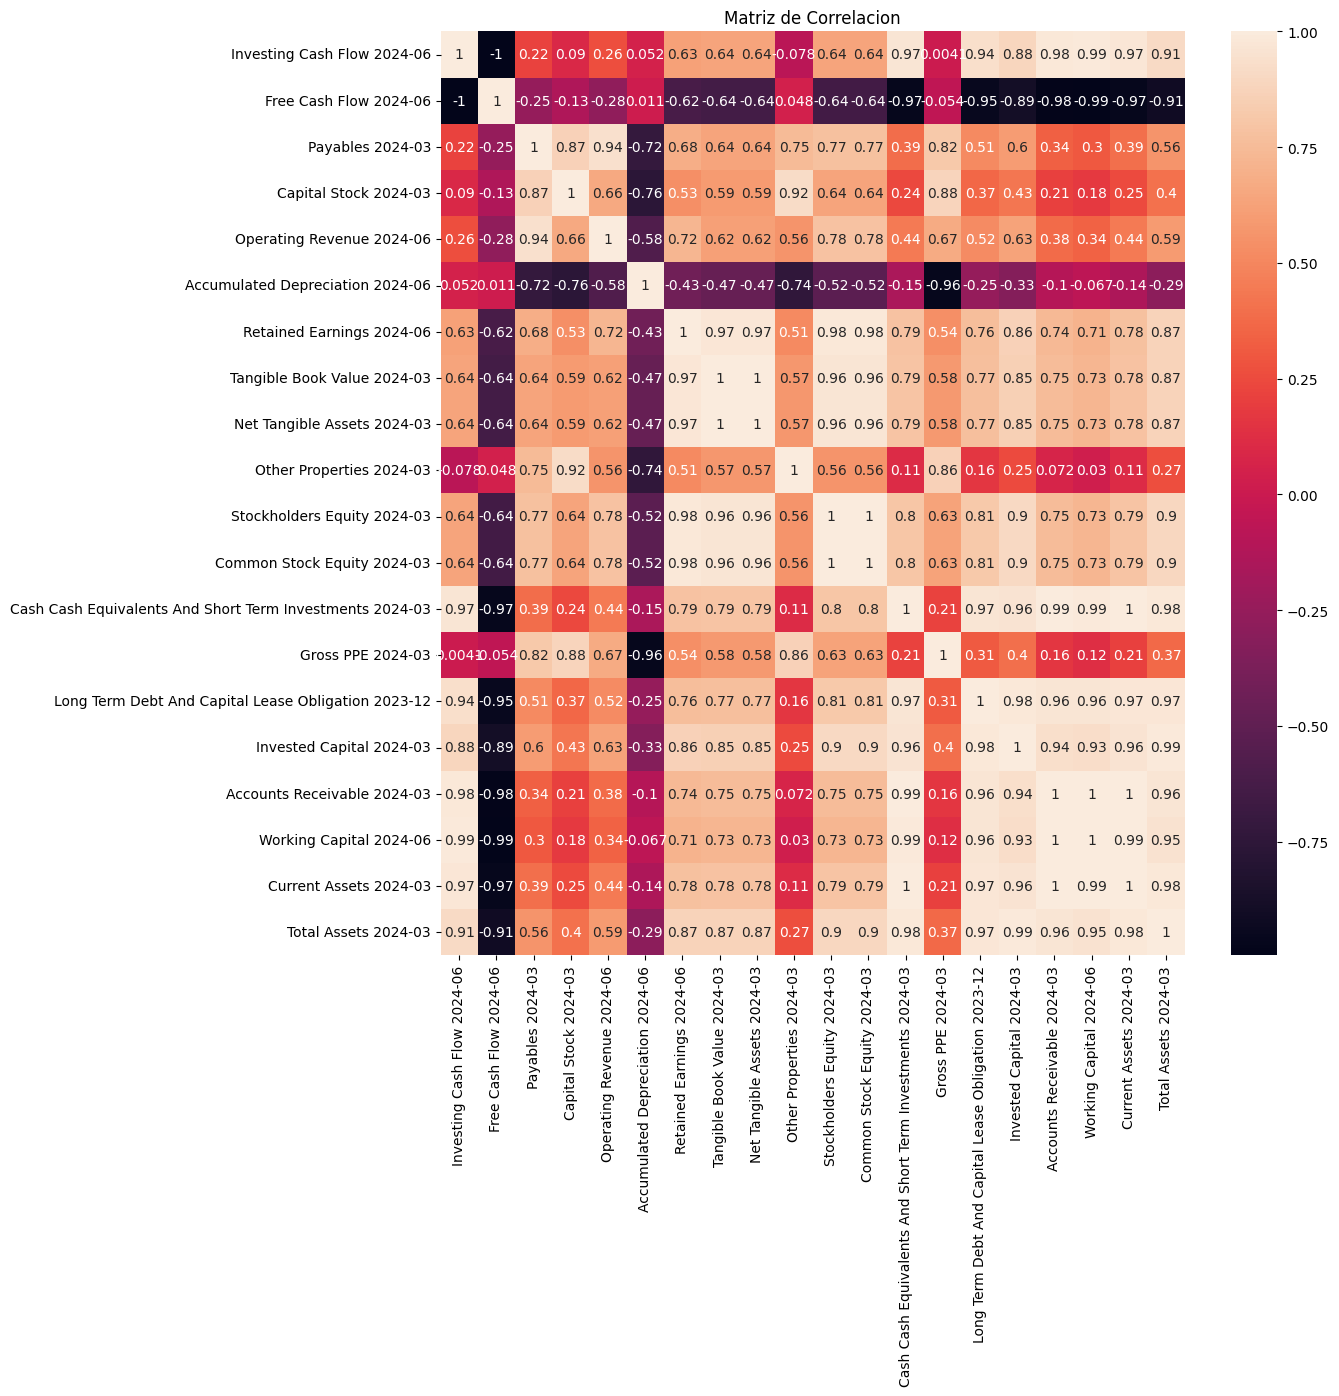

In [167]:
df_corr = filtered_df.corr()
plt.figure(figsize=(12, 12))
plt.title("Matriz de Correlacion")
sns.heatmap(df_corr, annot=True)

Análisis de valores atípicos mediante Boxplots y refinamiento de características
"Se genera una visualización de tipo boxplot para identificar la distribución y presencia de valores atípicos en las características seleccionadas. Posteriormente, se eliminan las cuatro últimas columnas del DataFrame, lo que reduce aún más la dimensionalidad y permite un análisis más enfocado."

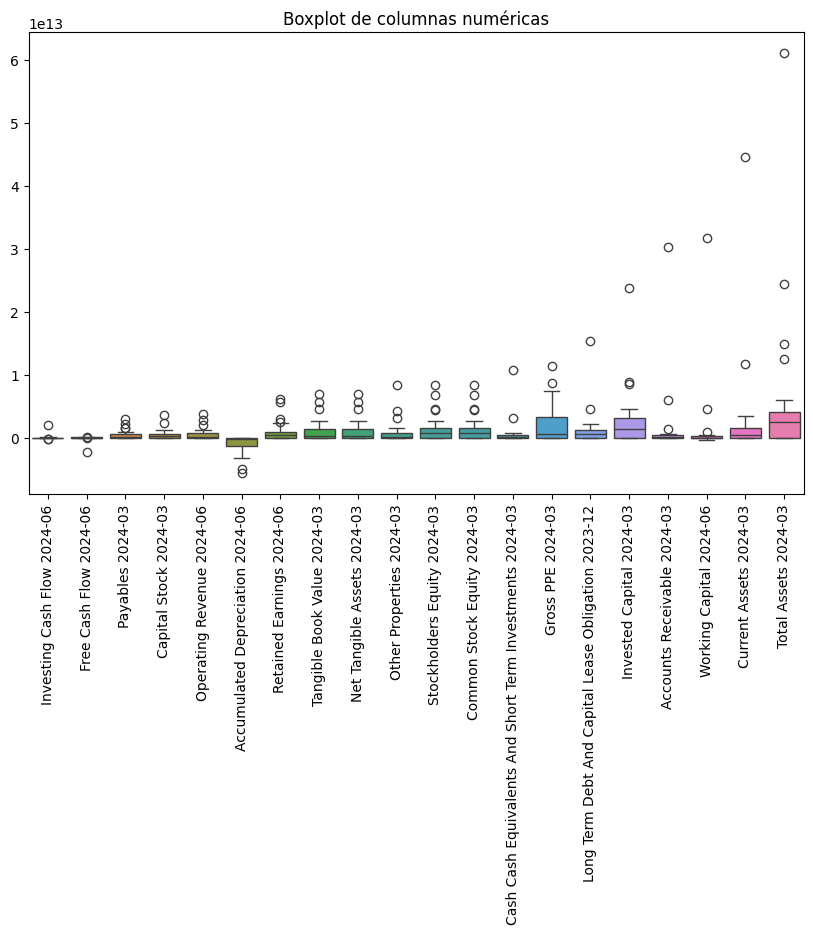

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=np.number))
plt.title("Boxplot de columnas numéricas")

# Rotar las etiquetas del eje X
plt.xticks(rotation=90)

plt.show()

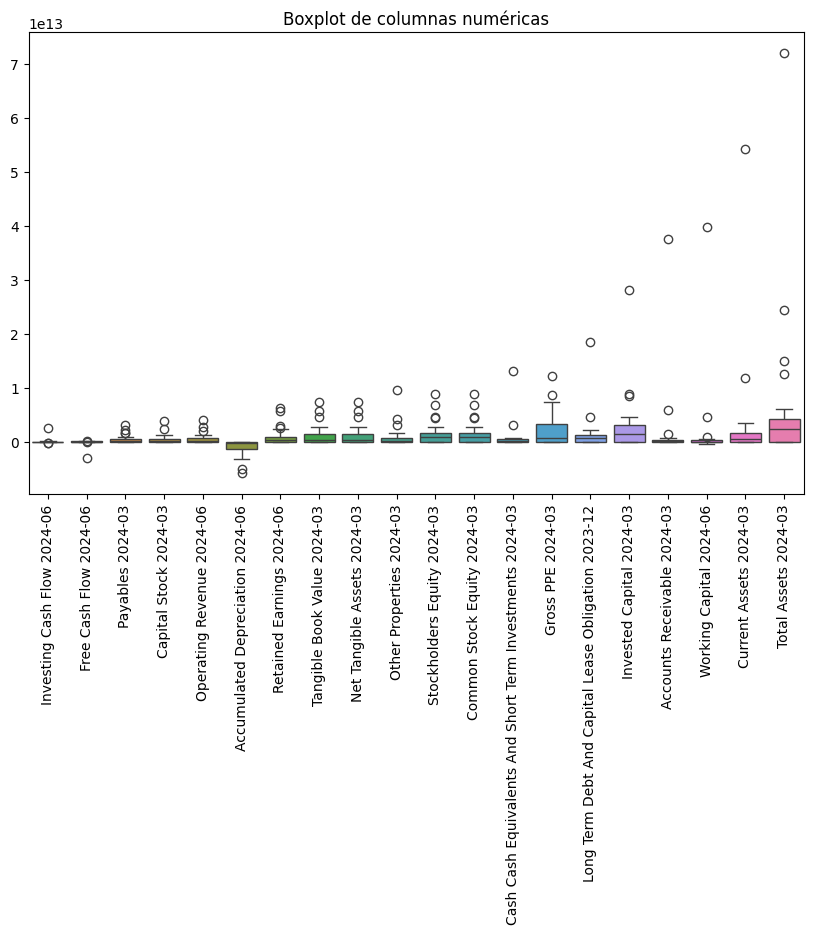

In [169]:
# Eliminar las cuatro últimas columnas
final_df = df_no_outliers.iloc[:, :-4]

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df.select_dtypes(include=np.number))
plt.title("Boxplot de columnas numéricas")

# Rotar las etiquetas del eje X
plt.xticks(rotation=90)

plt.show()

In [171]:
final_df

,Investing Cash Flow 2024-06,Free Cash Flow 2024-06,Payables 2024-03,Capital Stock 2024-03,Operating Revenue 2024-06,Accumulated Depreciation 2024-06,Retained Earnings 2024-06,Tangible Book Value 2024-03,Net Tangible Assets 2024-03,Other Properties 2024-03,Stockholders Equity 2024-03,Common Stock Equity 2024-03,Cash Cash Equivalents And Short Term Investments 2024-03,Gross PPE 2024-03,Long Term Debt And Capital Lease Obligation 2023-12,Invested Capital 2024-03
0,-3.525573e+10,5.279766e+10,9.581062e+10,1.555674e+11,1.505464e+11,-1.472903e+12,3.990126e+11,6.774091e+11,6.774091e+11,5.488457e+10,9.422325e+11,9.422325e+11,1.002031e+11,3.276616e+12,9.670504e+11,2.039465e+12
1,-8.534134e+10,-1.168847e+10,5.106039e+11,2.707376e+11,6.721929e+11,-1.302992e+12,9.157372e+11,2.361115e+11,2.361115e+11,6.316619e+11,1.119905e+12,1.119905e+12,3.694610e+11,2.233159e+12,9.918759e+11,2.158246e+12
2,-1.304100e+08,1.494290e+08,6.326980e+08,4.499781e+08,6.075790e+08,-4.342023e+09,1.566250e+09,2.148136e+09,2.148136e+09,8.051800e+07,2.213309e+09,2.213309e+09,5.031140e+08,8.965433e+09,1.123075e+09,3.830576e+09
3,8.702180e+09,-7.368503e+10,5.501014e+11,5.626933e+11,5.246415e+11,-1.168042e+12,9.139277e+11,1.100088e+12,1.100088e+12,4.321281e+11,1.431770e+12,1.431770e+12,6.964427e+11,2.614271e+12,1.258974e+12,2.780226e+12
4,-7.510043e+10,2.105067e+10,2.886229e+12,2.380289e+12,3.696796e+12,-3.299117e+12,2.260513e+12,1.405332e+12,1.405332e+12,3.101465e+12,4.327364e+12,4.327364e+12,6.876172e+11,7.407551e+12,4.526168e+12,8.890389e+12
5,-1.666490e+08,1.748820e+08,1.250530e+09,1.453728e+09,1.888413e+09,-6.650173e+09,8.083535e+09,7.356855e+09,7.356855e+09,4.261600e+08,8.044445e+09,8.044445e+09,7.013390e+08,1.479834e+10,4.945925e+09,1.344165e+10
6,2.488810e+08,-3.851500e+07,2.874570e+08,1.335388e+09,4.255230e+08,-3.323823e+09,1.263455e+09,2.977639e+09,2.977639e+09,6.657036e+09,3.028646e+09,3.028646e+09,9.901490e+08,8.237933e+09,2.042255e+09,4.995940e+09
7,-9.803500e+09,-8.105580e+09,1.769864e+11,7.461823e+10,2.373476e+11,-4.235290e+11,7.156280e+11,5.919526e+11,5.919526e+11,4.611763e+11,7.625276e+11,7.625276e+11,3.958190e+10,9.486464e+11,3.043527e+11,1.245990e+12
8,-3.567170e+08,-1.788910e+08,1.834136e+09,6.861140e+08,7.100648e+09,-1.035751e+10,1.344546e+10,1.136293e+10,1.136293e+10,1.401446e+09,1.233677e+10,1.233677e+10,2.050695e+09,2.388073e+10,8.625980e+09,2.147258e+10
9,-1.437750e+08,-1.245830e+08,2.692280e+08,1.043728e+09,4.908090e+08,-3.815163e+09,2.515784e+08,1.261087e+09,1.261087e+09,8.347210e+08,1.432777e+09,1.432777e+09,2.869265e+08,6.666331e+09,1.906313e+09,3.560212e+09


Aplicación de K-Means para segmentación de empresas
"Utilizando el algoritmo K-Means, se segmentaron las empresas en grupos basados en las características financieras seleccionadas. Este proceso incluyó la estandarización de los datos, la identificación del número óptimo de clústeres mediante el método del codo y la incorporación de etiquetas de clústeres al conjunto de datos original. Además, se enriqueció la segmentación con información del sector industrial de cada empresa."

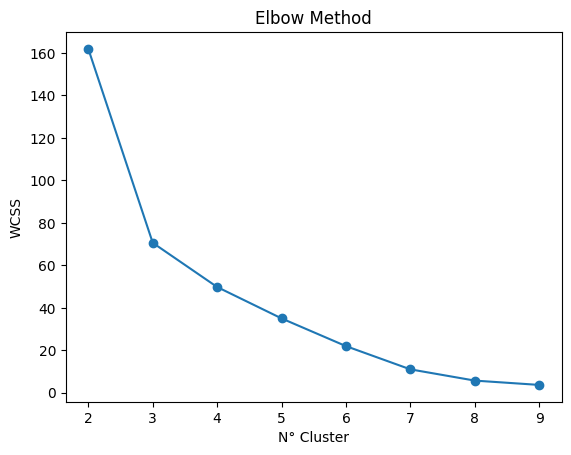

In [172]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Paso 1: Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_df)

wcss=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

#plot curva codo
plt.plot(range(2,10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('N° Cluster')
plt.ylabel('WCSS')
plt.show()

In [173]:
# Paso 2: Ejecutar K-Means
n_clusters = 5  # Cambia el número de clústeres según análisis previo
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_scaled)

# Paso 3: Agregar las etiquetas al DataFrame original
filtered_df['Cluster'] = kmeans.labels_

In [175]:
# Crear una nueva lista con los filtros antes desarrollados
mi_lista_filtrada = [item for idx, item in enumerate(valid_tickers) if idx not in posiciones_eliminadas]
sectors = [yf.Ticker(i).info.get("sector") for i in mi_lista_filtrada]

# Crear el DataFrame
df = pd.DataFrame({'Cluster': filtered_df['Cluster'], 'Empresa': mi_lista_filtrada, 'Sector': sectors})

# Mostrar el DataFrame
print(df)

    Cluster        Empresa                  Sector
0         4     AGUAS-A.SN               Utilities
1         4    ANDINA-B.SN      Consumer Defensive
2         0         CAP.SN         Basic Materials
3         4         CCU.SN      Consumer Defensive
4         2    CENCOSUD.SN       Consumer Cyclical
5         0        CMPC.SN         Basic Materials
6         0      COLBUN.SN               Utilities
7         0  CONCHATORO.SN      Consumer Defensive
8         0       COPEC.SN             Industrials
9         0         ECL.SN               Utilities
10        0      ENELAM.SN               Utilities
11        2   ENELCHILE.SN               Utilities
12        4       ENTEL.SN  Communication Services
13        3   FALABELLA.SN       Consumer Cyclical
14        4         IAM.SN               Utilities
15        0         LTM.SN             Industrials
16        4   MALLPLAZA.SN             Real Estate
17        4     PARAUCO.SN             Real Estate
18        1    QUINENCO.SN     

Visualización de Clústeres mediante PCA
"Reducimos las dimensiones de las características financieras a dos componentes principales utilizando Análisis de Componentes Principales (PCA). Esto permite visualizar los clústeres generados por el algoritmo K-Means en un espacio bidimensional. Además, se incluyen etiquetas para identificar cada empresa en el gráfico."

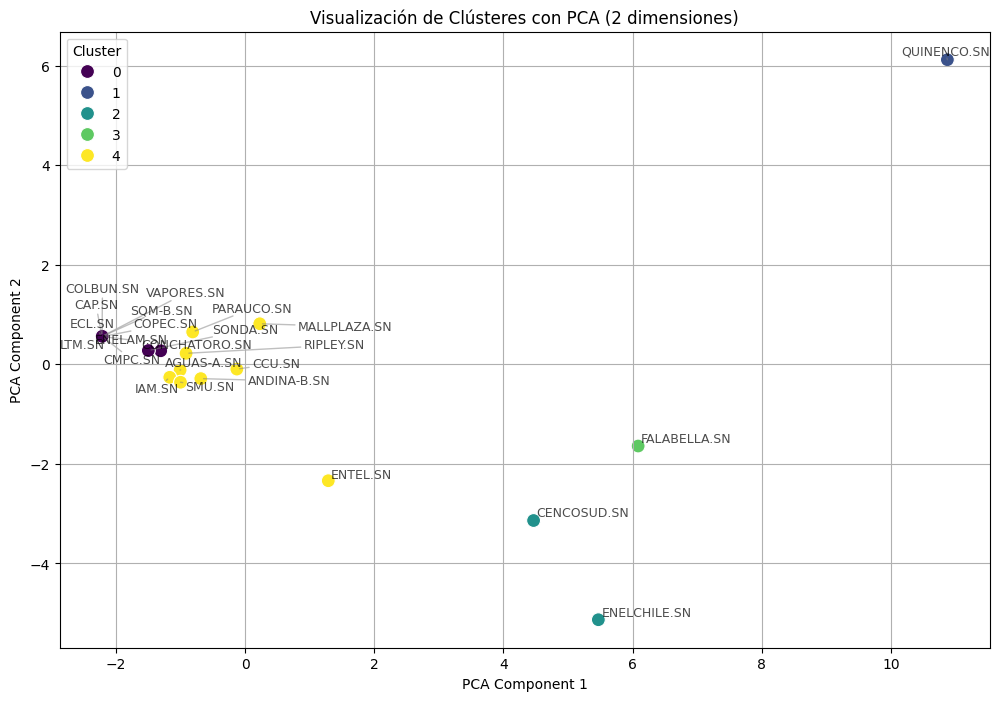

In [176]:
from sklearn.decomposition import PCA
import seaborn as sns
from adjustText import adjust_text

# Reducir dimensiones con PCA
pca_num_components = 2  # Número de componentes principales
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

# Agregar las etiquetas de clúster al DataFrame reducido
results['Cluster'] = df['Cluster']

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pca1", y="pca2", hue='Cluster', data=results, palette="viridis", s=100)

# Agregar etiquetas de empresas a cada punto
texts = []
for i in range(len(results)):
    texts.append(plt.text(
        x=results['pca1'][i],
        y=results['pca2'][i],
        s=mi_lista_filtrada[i],  # Nombre de la empresa
        fontsize=9, color='black', alpha=0.7
    ))

# Ajustar las etiquetas para evitar superposición
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

plt.title('Visualización de Clústeres con PCA (2 dimensiones)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


HASTA AQUI EL AGRUPAMIENTO DE LAS EMPRESAS DEL IPSA SEGUN ESTADOS FINANCIEROS, EN UNA SEGUNDA PARTE SE CLASIFICARA USANDO INDICADORES FINANCIEROS OBTENIDOS DE LOS ESTADOS FINANCIEROS Y HAREMOS UNA COMPARACION

**-OBTENCION DE INDICADORES FINANCIEROS-**

-INDICADORES DE RENTABILIDAD

Margen Neto (Net Profit Margin):
Net Income/Total Revenue | LISTO

Margen Operativo (Operating Margin):
Operating Revenue/ Total Revenue | DESCARTADO, todos 1

ROE (Return on Equity):
Net Income/Stockholders Equity | LISTO

ROA (Return on Assets):
Net Income/Total Assets | LISTO

ROIC (Return on Invested Capital):
Net Income−Dividends / Invested Capital | DESCARTADO, problemas con dividends 3, 11, 16 , 23, 26

Earnings Yield:
EPS /Market Price per Share | POSPUESTO

Indicadores de Riesgo Financiero

    Deuda Neta a EBITDA:
    Net Debt (Total Debt - Cash And Cash Equivalents)/EBITDA |PROBLEMAS CON EBITDA PERO QUEDA
    
    Evalúa la capacidad de la empresa para pagar su deuda neta usando sus ganancias operativas.

    Ratio de Apalancamiento (Leverage Ratio):
    Total Liabilities/Total Equity | LISTO
    
    Indica cuánto riesgo financiero asume la empresa al financiarse con deuda.

In [ ]:
#ULTIMO Y ACTUAL
def calculate_metric(data_list_fs, data_list_bs, numerator_key, denominator_key, result_key, numerator_subtract_key=None, data_list_subtract=None):
    results = []
    for ele in range(len(data_list_fs)):
        try:
            # Handle the numerator subtraction if specified
            if numerator_subtract_key and data_list_subtract:
                numerator = data_list_fs[ele].loc[numerator_key] - data_list_subtract[ele].loc[numerator_subtract_key]
            else:
                numerator = data_list_fs[ele].loc[numerator_key]

            # Denominator
            denominator = data_list_bs[ele].loc[denominator_key]

            # Check if the denominator contains any zero values
            if (denominator == 0).any():
                # Create a DataFrame with all values set to 0
                result = pd.DataFrame(
                    0,
                    columns=data_list_fs[ele].columns,
                    index=[result_key]
                )
            else:
                # Perform the calculation
                result = pd.DataFrame(
                    [numerator / denominator],
                    columns=data_list_fs[ele].columns,
                    index=[result_key]
                )

            # Append the result DataFrame to the results list
            results.append(result)

        except Exception as e:
            print(f"An error occurred for element {ele}: {e}")
            continue

    return results


In [ ]:
#without sustraction
results = calculate_metric(l_q_fs, l_q_bs, 'Net Income', 'Total Assets', 'Return on Assets')

#with sustraction
results = calculate_metric(l_q_fs, l_q_bs, 'Net Income', 'Other Expenses', 'Return on Assets', numerator_subtract_key='Taxes', data_list_subtract=l_q_fs)



In [ ]:
#Margen Neto (Net Profit Margin): -OK-
#l_q_fs[10].loc['Net Income']/l_q_fs[10].loc['Total Revenue']

results = calculate_metric(l_q_fs, l_q_fs, 'Net Income', 'Total Revenue', 'Margen Neto')

In [ ]:
#ROE (Return on Equity): Net Income/Stockholders Equity -OK-
#l_q_fs[ele].loc['Net Income']/l_q_bs[ele].loc['Stockholders Equity']

results = calculate_metric(l_q_fs, l_q_bs, 'Net Income', 'Stockholders Equity', 'Return on Equity')

In [ ]:
#ROA (Return on Assets): Net Income/Total Assets -OK-
#l_q_fs[ele].loc['Net Income']/l_q_bs[ele].loc['Total Assets']

results = calculate_metric(l_q_fs, l_q_bs, 'Net Income', 'Total Assets', 'Return on Assets')

In [ ]:
#ROIC (Return on Invested Capital): Net Income − Dividends / Invested Capital
#l_q_fs[ele].loc['Net Income'] - l_q_bs[ele].loc['Dividends Payable'] / l_q_bs[ele].loc['Invested Capital']

results = calculate_metric(l_q_fs, l_q_bs, 'Net Income', 'Dividends Payable', 'Return on Invested Capital', numerator_subtract_key='Dividends Payable', data_list_subtract=l_q_bs)


An error occurred for element 3: 'Dividends Payable'
An error occurred for element 11: 'Dividends Payable'
An error occurred for element 12: 'Dividends Payable'
An error occurred for element 16: 'Dividends Payable'
An error occurred for element 23: 'Dividends Payable'


In [ ]:
#Deuda Neta a EBITDA: Net Debt (Total Debt - Cash And Cash Equivalents)/EBITDA
#(l_q_bs[0].loc['Total Debt'] - l_q_bs[0].loc['Cash And Cash Equivalents'] / l_q_fs[0].loc['EBITDA']

results = calculate_metric(l_q_bs, l_q_fs, 'Total Debt', 'EBITDA', 'EBITDA: Net Debt', numerator_subtract_key='Cash And Cash Equivalents', data_list_subtract=l_q_bs)


An error occurred for element 2: 'EBITDA'
An error occurred for element 3: 'EBITDA'
An error occurred for element 7: 'EBITDA'
An error occurred for element 18: 'EBITDA'


In [ ]:
l_q_fs[2].loc['EBITDA']

KeyError: 'EBITDA'

In [ ]:
#Earnings Yield: EPS /Market Price per Share
#l_q_fs[ele].loc['Diluted EPS']/l_q_bs[ele].loc['Total Assets']

In [ ]:
#Ratio de Apalancamiento (Leverage Ratio): Total Liabilities/Total Equity -OK-
#Indica cuánto riesgo financiero asume la empresa al financiarse con deuda
#l_q_bs[ele].loc['Total Liabilities Net Minority Interest']/l_q_bs[ele].loc['Total Assets']

results = calculate_metric(l_q_bs, l_q_bs, 'Total Liabilities Net Minority Interest', 'Total Assets', 'Leverage Ratio')

2. Indicadores de ValuacióN

Precio/Ganancia (P/E Ratio):
EPS/Market Price per Share​

Precio/Valor en Libros (P/B Ratio):
Market Price per Share / (Stockholders Equity/Shares Outstanding)

Enterprise Value/EBITDA (EV/EBITDA):
Enterprise Value​ / EBITDA

Precio/Ventas (P/S Ratio):
Market Capitalization / Total Revenue


In [ ]:
from sklearn.impute import KNNImputer

def knn_impute_nan_entire_df(dataframes_list, n_neighbors=3):
    """
    Use KNN to impute NaN values in a list of DataFrames for all columns.

    Args:
    - dataframes_list (list): List of DataFrames to process.
    - n_neighbors (int): Number of neighbors to use for KNN imputation.

    Returns:
    - list: List of DataFrames with NaN values imputed.
    """
    updated_dataframes = []

    for i, df in enumerate(dataframes_list):
        try:
            # Transpose the DataFrame to match KNNImputer's expected input format
            df_transposed = df.T

            # Apply KNN imputer
            imputer = KNNImputer(n_neighbors=n_neighbors)
            imputed_data = imputer.fit_transform(df_transposed)

            # Reconstruct the DataFrame with imputed values
            df_imputed = pd.DataFrame(imputed_data, columns=df_transposed.columns, index=df_transposed.index).T

            # Append the updated DataFrame to the list
            updated_dataframes.append(df_imputed)
        except Exception as e:
            print(valid_tickers[i])
            print(f"An error occurred at iteration {i} (DataFrame index {i}): {e}")
            updated_dataframes.append(df)

    return updated_dataframes

# Apply KNN imputation to the entire DataFrame
l_q_fs_knn_imputed_all = knn_impute_nan_entire_df(l_q_fs_cleaned, n_neighbors=3)

# Check the imputed DataFrames
#for i, df in enumerate(l_q_fs_knn_imputed_all):
#    print(f"Imputed DataFrame {i}:")
#    print(df)


In [ ]:
valid_tickers[18]

'ITAUCL.SN'